In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.insert(1, '/home/federico/Università/Tesi_magistrale/my_programs/')

from contact_matrix_utils import *
from settings import *
from src.slice_pairwise import *
from src.interchromosomal_cosegregation import *
from src.slice_pairwise_inter import *
from numpy.random import Generator, MT19937
from scipy.stats import pearsonr, spearmanr
from scipy.spatial.distance import squareform

plt.style.use('default')

# Data preparation and info #

In [2]:
#1NP
name_root_1NP_1Mb = "mesc_46C_1Mb_481x1"
path_1 =      r"/home/federico/Università/Tesi_magistrale/SLICE/slice_repository/data/" + name_root_1NP_1Mb + "/"
file_name_1 = "segregation_" + name_root_1NP_1Mb +  ".pkl"
with open(path_1 + file_name_1, 'rb') as f_1:
    segregation_table_1NP = pickle.load(f_1)

gw_coseg_matrix_1NP, gw_norm_link_disq_1NP = compute_coseg_nld_genomewide(segregation_table_1NP, 1, 19)


#3NP
name_root_3NP_1Mb = "iza-mesc_1Mb_420x3"
path_2 =      r"/home/federico/Università/Tesi_magistrale/SLICE/slice_repository/data/" + name_root_3NP_1Mb + "/"
file_name_2 = "segregation_" + name_root_3NP_1Mb +  ".pkl"
with open(path_2 + file_name_2, 'rb') as f_2:
    segregation_table_3NP = pickle.load(f_2)

gw_coseg_matrix_3NP, gw_norm_link_disq_3NP = compute_coseg_nld_genomewide(segregation_table_3NP, 1, 19)



start_chr, stop_chr = 1, 19
stop_chr += 1
chromosomes = []
n_chromosomes = stop_chr - start_chr

l = []
size = 0

for i in range(start_chr, stop_chr):
    chrA = 'chr' + str(i)
    chromosomes += [chrA]
    s = segregation_table_1NP[chrA]['segregation_table'].shape[0]
    size += s
    l.append(s) 

chr_windows_sizes = np.array(l)

for i in range(gw_coseg_matrix_1NP.shape[0]):
    for j in range(gw_coseg_matrix_1NP.shape[1]):
        gw_coseg_matrix_1NP[j,i] = gw_coseg_matrix_1NP[i,j]
        gw_norm_link_disq_1NP[j,i] = gw_norm_link_disq_1NP[i, j]

        gw_coseg_matrix_3NP[j,i] = gw_coseg_matrix_3NP[i,j]
        gw_norm_link_disq_3NP[j,i] = gw_norm_link_disq_3NP[i, j] 



In [ ]:
print("Dimensioni del dataset: " , gw_coseg_matrix_1NP.shape)
print("Numero di nan nella coseg"  , np.argwhere(gw_coseg_matrix_1NP != gw_coseg_matrix_1NP).shape)
print("Numero di nan nella nld  "    , np.argwhere(gw_norm_link_disq_1NP != gw_norm_link_disq_1NP).shape)

print("Numero di zeri nella coseg "  , np.argwhere(gw_coseg_matrix_1NP == 0).shape)
print("Numero di zeri nella nld "  ,   np.argwhere(gw_norm_link_disq_1NP == 0).shape)

Dimensioni del dataset:  (2473, 2473)
Numero di nan nella coseg (2473, 2)
Numero di nan nella nld   (2473, 2)
Numero di zeri nella coseg  (1088934, 2)
Numero di zeri nella nld  (1088934, 2)


(<Figure size 1000x400 with 4 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

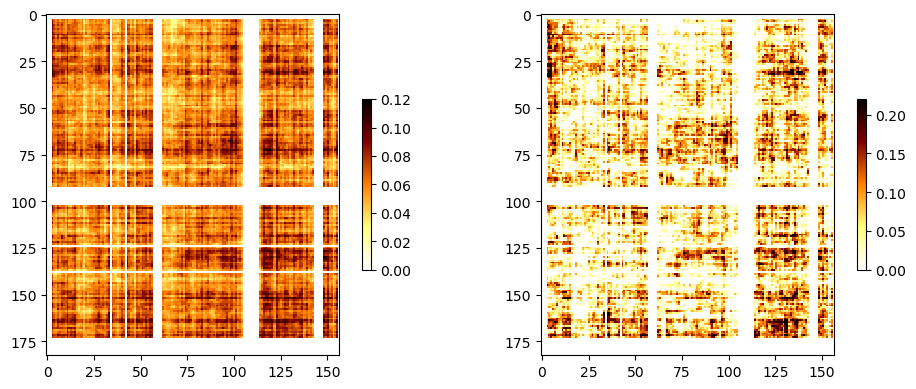

In [5]:
start_row    = np.sum(chr_windows_sizes[:1])
stop_row     = start_row + chr_windows_sizes[1]
start_column = np.sum(chr_windows_sizes[:3])
stop_column  = start_column + chr_windows_sizes[3]

plot_multiple_heatmaps( n_mats=2, mats= [ gw_coseg_matrix_1NP[start_row:stop_row, start_column:stop_column], gw_norm_link_disq_1NP[start_row:stop_row, start_column:stop_column]], vmin=[0., 0.], vmax = [0.12, 0.22])